# Workshop 7: Neural Network (Part 1)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Forward Propagation
Forward propagation is where input data is fed through a network, in a forward direction, to generate an output.
#### Exercise 1. Could you design scripts to compute the output of the following neural network?

1. What is Forward Propagation?


Forward propagation is the process by which a neural network takes an input and computes the output step by step through each layer.
It’s basically the “prediction phase” of the network, where information flows from the input layer to the output layer.

2. The Core Idea
In each layer, the network does two things:

A linear transformation:

z=Wx+b

A nonlinear activation:


a=σ(z)

3. Why do we need it? 


Forward propagation generates the predicted output.
During training, this output is compared with the true label to compute the loss, which is later used in backpropagation.

### Here we gonna do some Simple Coding Examples together

In [ ]:
# Example 1 — Single Neuron, No Activation

#Here our input vector has three features: 0.3, 0.7, and 0.2.
data = np.array([0.3,0.7,0.2]).reshape(1,-1) # shape is 1 by 3
weight = np.array([0.5,0.2,0.3]).reshape(-1,1)  #We also have a weight vector with three corresponding weights.

#This represents a single neuron.
#Forward propagation here is simply the weighted sum of the inputs.

data@weight   # try to compute the value of the neuron yourself.

array([[0.35]])

In [ ]:
# Example 2 — Two-Layer Linear Network (No Activation)

data = np.array([0.3,0.7]).reshape(1,-1) # We now have a 2-dimensional input: 0.3 and 0.7.
weight_1 = np.array([[0.5,0.2,0.4],[-0.3,-0.3,0.6]])  
weight_2 = np.array([0.5,-0.6,0.8]).reshape(-1,1)

#The first weight matrix maps the input to a hidden layer of three neurons.

data@weight_1@weight_2  #First compute values after the hidden layer . Then multiply that result by weight_2 to get the final output.

array([[0.492]])

In [ ]:
# Example 3 — Single Neuron With Sigmoid Activation

#This is again a single neuron with three inputs and one weight vector.
data = np.array([0.3,0.7,0.2]).reshape(1,-1)
weight = np.array([0.5,0.2,0.3]).reshape(-1,1)
z = data@weight  # is the linear part.

#Now we add an activation function.   
output = 1/(1+np.exp(-z)) #Then we apply the sigmoid function to get a non-linear output.


output #The output is a value between 0 and 1 — typical for sigmoid.

array([[0.58661758]])

In [ ]:
# Example 4 — Two-Layer Network With Sigmoid Activation

# We again start with a 2-dimensional input.
# The first weight matrix gives us a hidden layer of three neurons.
data = np.array([0.3,0.7]).reshape(1,-1)
weight_1 = np.array([[0.5,0.2,0.4],[-0.3,-0.3,0.6]])
weight_2 = np.array([0.5,-0.6,0.8]).reshape(-1,1)

z1 = data@weight_1
h = 1/(1+np.exp(-z1)) #Apply sigmoid to get the hidden activations

z2 = h@weight_2 # Compute the values after second linear layer
output = 1/(1+np.exp(-z2)) #Apply sigmoid again for the final output
output # The final output is the result of two forward-propagation steps.

array([[0.61548081]])

## 2. Backward Propagation

Backpropagation is the way a neural network learns from its mistakes.

In the forward pass, the model makes a prediction.

In the backward pass, the model looks at how wrong the prediction was,

calculates how each weight contributed to that error,

and then adjusts those weights to make the next prediction better.

You can think of forward propagation as making a guess,

and backpropagation as figuring out how to improve that guess.

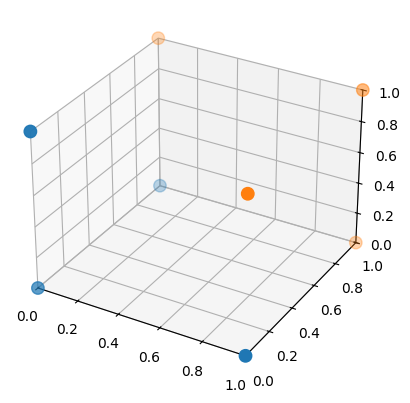

In [7]:
data = np.array([[1,0,0,0],#0
                 [1,0,0,1],#0
                 [1,1,0,0],#0
                 [1,0,1,0],#0
                 [1,1,1,0],#1
                 [1,0,1,1],#1
                 [1,1,0,1],#1
                 [1,1,1,1]])#1

y = np.array([0,0,0,0,1,1,1,1])

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

ax.scatter(data[:4,1],data[:4,2],data[:4,3],s=80)
ax.scatter(data[4:,1],data[4:,2],data[4:,3],s=80)

Forward propagation goes from input → output.

Backpropagation goes from output → input.

So the two processes always occur together:

Forward computes the prediction.

Backward computes how to update the weights.

#### 1. Square error, without activation function

In this example, the model has no activation function.

It predicts using a simple linear combination of the inputs.

The loss we implicitly use is mean squared error.

So during backpropagation, the gradient of the loss with respect to the prediction is:

### Mean Squared Error (MSE)

$$
J(\theta)
= \frac{1}{2m} \sum_{i=1}^{m} 
\left( \hat{y}^{(i)} - y^{} \right)^2

Where:

- \( y^{(i)} \): true label  
- \( \hat{y}^{(i)} \): model prediction  
- \( m \): number of samples  

The gradient of MSE with respect to the prediction is:

$$
\frac{\partial J}{\partial \hat{y}} 
= \hat{y} - y
$$

In [12]:
theta = np.array([1.0,2.0,1.0,1.0])
alpha = 0.005

for epoch in range(10000):
    #First, we run a forward pass by computing
    y_pred = data@theta # This gives us the model’s prediction.
    
    #The gradient of the loss with respect to the prediction is
    Gradient_1 =y_pred-y

    #and the gradient of the prediction with respect to the weights is simply the input matrix.
    #So the full gradient is
    Gradient_full =Gradient_1@data

    #Finally, we update theta using gradient descent:
    theta-=alpha*Gradient_full
    
z = data@theta  # That’s backpropagation for a linear model:
                #forward computes the prediction,
                #backward computes how to adjust the weights to reduce the error.
z

array([-0.25,  0.25,  0.25,  0.25,  0.75,  0.75,  0.75,  1.25])

#### 2. Square error, Sigmoid activation function:
$$
f(z)=\frac{1}{1+e^{-z}}
$$

In [16]:
theta = np.array([1.0,2.0,1.0,1.0])
alpha = 0.05

for epoch in range(5000):
    z = data@theta        # We compute the linear combination of inputs and weights:
    a = 1/(1+np.exp(-z))  # Then we apply the sigmoid activation:
                          #This gives us the model’s prediction for each training sample.

    # Now for the backward pass.
    # Backpropagation uses the chain rule to compute the gradient with respect to the weights.
    # We break it into three parts:

    # 1.The derivative of the loss with respect to the prediction:
    d_1=(a-y)
    # 2. The derivative of the sigmoid with respect to its input:
    j = a*(1-a)
    # 3.And the derivative of the linear function with respect to the weights:
    gradient = (d_1*j)@data
    #Multiplying these three pieces together gives us the gradient:


    theta-=alpha*gradient
    #Finally, we repeat this process for many epochs until the parameters converge.

    #So this code demonstrates a complete forward-and-backward pass for a single-layer model with a sigmoid activation.”
    
z = data@theta
a = 1/(1+np.exp(-z))
a

array([0.00133963, 0.1044789 , 0.1044789 , 0.1044789 , 0.91029002,
       0.91029002, 0.91029002, 0.99886817])

#### 2.5. Square error loss, Tanh activation function:
$$
f(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}
$$

In [34]:
theta = np.array([1.0,2.0,1.0,1.0])
y = np.array([0,0,0,0,1,1,1,1])
alpha = 0.01

for epoch in range(5000):
    # --------------------------
    # Forward pass
    # --------------------------
    z = data @ theta                       # Linear part: z = Xθ
    a = (np.exp(z)-np.exp(-z)) / (np.exp(z)+np.exp(-z))   # Tanh activation
    # a is the model's prediction

    # --------------------------
    # Backpropagation
    # --------------------------

    # 1. Derivative of Square Error loss w.r.t model output a:
    #    L = 1/2 * (a - y)^2
    #    dL/da = a - y
    d_mse = a - y

    # 2. Derivative of tanh activation:
    #    tanh'(z) = 1 - a^2
    j = 1 - a**2

    # 3. Derivative of linear function with respect to θ:
    #    dz/dθ = X  (the data matrix)
    # 4. Full gradient via chain rule:
    gradient = (d_mse * j) @ data

    # --------------------------
    # Gradient descent update
    # --------------------------
    theta -= alpha * gradient

# After training
z = data @ theta
a = (np.exp(z)-np.exp(-z)) / (np.exp(z)+np.exp(-z))
a


array([-0.43286051,  0.24662569,  0.24662569,  0.24662569,  0.74740283,
        0.74740283,  0.74740283,  0.93315591])

#### 3. Cross-entropy loss, Tanh activation function:


In [22]:
theta = np.array([1.0,2.0,1.0,1.0])
y = np.array([0,0,0,0,1,1,1,1])
alpha = 0.01

for epoch in range(5000):
    z = data@theta #In the forward pass, we first compute the linear part:
    a = (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z)) #Then we apply the tanh activation function:
    #This gives us the model’s predictions.

    # is the derivative of the binary cross-entropy loss with respect to the output.
    d_bce = ((1-y)/(1-a)-y/a)
    #the derivative of tanh:
    j=1-a**2

    #Finally, we multiply by the derivative of the linear function with respect to the weights:
    gradient = (d_bce*j)@data

    theta-=alpha*gradient
    #This demonstrates a complete forward-and-backward pass using the tanh activation combined with a cross-entropy-style gradient.
    
z = data@theta
a = (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
a

array([-0.99999371, -0.95990077, -0.95990077, -0.95990077,  0.98508491,
        0.98508491,  0.98508491,  0.99999769])

In [22]:
test_data = np.array([1,0.2,0.1,0.05])
z = test_data@theta
a = (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
a

-0.9998640781861056

#### 4. Cross-entropy loss, Sigmoid activation function:
$$
f(z)=\frac{1}{1+e^{-z}}
$$

In [2]:
import numpy as np

In [ ]:
theta = np.array([1.0,2.0,2.0,1.0])
y = np.array([0,0,0,0,1,1,1,1])
alpha = 0.005

for epoch in range(2000):
    z = data@theta # First, the forward pass.We compute the linear part:
    a = 1/(1+np.exp(-z)) #and then apply the sigmoid activation:
                         #This gives us a probability for each training sample.

    g_bce = ((1-y)/(1-a)-y/a)   #The derivative gradient of the BCE loss with respect to the output:
    j = a*(1-a)          # The derivative of the sigmoid activation:

    #And the derivative of the linear function with respect to the weights is data
    #Putting everything together, the gradient becomes:
    g = (g_bce*j)@data
    theta-=alpha* g
    #This is the complete forward-and-backward pipeline of logistic regression with a sigmoid activation and cross-entropy loss.
    
z = data@theta
a = 1/(1+np.exp(-z))
a

array([0.01903027, 0.23078929, 0.23528558, 0.23528558, 0.82992643,
       0.82634598, 0.82634598, 0.98692326])

## Multi-layer Neural Network

Here we define a very small 2-dimensional dataset with four samples.

Each row contains a bias term ‘1’ followed by two binary input features.

The array y contains the labels for each sample.

So our training set contains four examples, each belonging to either class 0 or class 1.

In [30]:
data_2D = np.array([[1,0,0],#0
                    [1,1,0],#1
                    [1,0,1],#1
                    [1,1,1]])#0

We build a simple neural network with one hidden layer.

The input layer has 3 inputs — the bias and two features.

The hidden layer has 2 neurons, and the output layer has 1 neuron.

theta_1 contains the weights from the input layer to the hidden layer,

and theta_2 contains the weights from the hidden layer to the output layer.

This is a classic two-layer feed-forward neural network

In [ ]:


theta_1 = np.array([[1.0,0.0],
                    [1.0,0.0],
                    [1.0,0.0]])
theta_2 = np.array([[1.0],
                    [0.0]])
y = np.array([0,1,1,0]).reshape(-1,1)
alpha = 0.05

###

for epoch in range(90000):
    #In the forward pass, we start with the hidden layer. We compute the linear combination
    z_1 = data_2D@theta_1
    #and then apply the sigmoid activation to obtain
    h_1 = 1/(1+np.exp(-z_1))
    #These values h_1 are the activations of the two hidden neurons.

    #Next, we pass the hidden activations into the output layer.We compute another linear transformation
    z_2 = h_1@theta_2
    #and again apply the sigmoid function to produce the final output
    h_2 = 1/(1+np.exp(-z_2))
    #h_2 represents the model’s predicted probability for each sample.

    #Now we calculate the gradients for backpropagation.
    
    #The gradient for the second layer weights is:
    g_2 = h_1.T@(h_2-y)
    theta_2-=alpha*g_2

    #To backpropagate the error into the hidden layer,
    #we multiply the output error local partial gradient by the second layer weight
    g_1_h=(h_2-y)@theta_2.T

    # and then multiply by the derivative of the sigmoid at the hidden layer:
    g_1_sig = h_1*(1-h_1)
    #The gradient with respect to the first-layer weights is then:
    g_1 = data_2D.T@(g_1_h*g_1_sig)
    theta_1-=alpha*g_1
    
    
z_1 = data_2D@theta_1
h_1 = 1/(1+np.exp(-z_1))
z_2 = h_1@theta_2
h_2 = 1/(1+np.exp(-z_2))

h_2

array([[0.00405776],
       [0.99782612],
       [0.99782612],
       [0.00343751]])

In [ ]:

pred_list=[]
for i in h_2:
    if(i>=0.5):
        pred_list.append(1)
    else:
        pred_list.append(0)
        
count=0
for i in (np.array(pred_list)-y.reshape(-1)):
    if(i==0):
        count+=1
        
count/len(y)

1.0

In [33]:
theta_1 = np.array([[1.0,0.0],
                    [1.0,0.0],
                    [1.0,0.0]])
theta_2 = np.array([[1.0],
                    [0.0]])
y = y.reshape(-1,1)
alpha = 0.05

for epoch in range(40):
    z_1 = X@theta_1
    h_1 = 1/(1+np.exp(-z_1))
    z_2 = h_1@theta_2
    h_2 = 1/(1+np.exp(-z_2))
    
    theta_2-=alpha*h_1.T@(h_2-y)
    theta_1-=alpha*X.T@(((h_2-y)@theta_2.T)*h_1*(1-h_1))
    
    
z_1 = X@theta_1
h_1 = 1/(1+np.exp(-z_1))
z_2 = h_1@theta_2
h_2 = 1/(1+np.exp(-z_2))

pred_list=[]
for i in h_2:
    if(i>=0.5):
        pred_list.append(1)
    else:
        pred_list.append(0)
        
count=0
for i in (np.array(pred_list)-y.reshape(-1)):
    if(i==0):
        count+=1
        
count/len(y)

0.5

In [199]:
count=0
for i in (np.array(pred_list)-y):
    if(i==0):
        count+=1
        
count/len(y)

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1])